Mid June 2015, I had lost a total of 140 pounds of body weight. It was the greatest achievement I had accomplished up to that point. 

Unfortunately, the trend has decidedly been reversed and over the last 8 years I have gained back about 100 pounds. 

As dissappointing as this is, it provides an excuse for me to break out some python and take a look at what my next steps are to lose some of this weight. 

Step one, let's import the powerful libraries we'll need and load in our first csv with the weight data. 

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
df_weight = pd.read_csv('weight_data.csv')

display(df_weight)

,Date,Weight
0,2012-06-01,336.0
1,2014-08-01,270.0
2,2014-10-27,257.0
3,2014-10-28,255.0
4,2014-10-29,252.0
...,...,...
280,2022-10-26,286.0
281,2022-10-30,283.0
282,2022-11-18,288.0
283,2022-11-24,289.0


The display command shows the head and tail of the dataframe. 

290 is my current weight. 

336 is my starting weight. 

The more interesting thing for us to see is what happened in the middle. 

There is an equation called the "Harris-Benedict" equation that can calculate the basal (or resting) metabolic rate. 

Below, I have this defined in a function. 

In [145]:
def bmr(weight, height_inches, age):
    bmr = (10*0.453592*weight)+(6.25*height_inches*2.54)-(5*age)+5
    return bmr

my_bmr = bmr(290, 71, 27)

print(my_bmr)

2312.5418


Next, I can call a function with a function and adjust the basal metabolic rate to respond to exercise levels. 

The function that works through the exercise level is called the tdee. That's the Total Daily Energy Expenditure. 

My exercise level is lightly_active which means I burn about a third more calories than my bmr. 

In [146]:
def tdee(weight, height_inches, age, activity_level):
    if activity_level == 'sedentary':
        return bmr(weight, height_inches, age)*1.2
    elif activity_level == 'lightly_active':
        return bmr(weight, height_inches, age)*1.375
    elif activity_level == 'active':
        return bmr(weight, height_inches, age)*1.55
    elif activity_level == 'highly_active':
        return bmr(weight, height_inches, age)*1.725
    else:
        print("Please input proper syntax: tdee(weight, height_inches, age, activity_level)")
    
my_tdee=tdee(290, 71, 27, 'lightly_active')
    
print(my_tdee)

3179.744975


Great. 

As a 5'11", 27 year old, 290 pound man I will burn 3179 Calories. 

Forgot to mention, I only put the men's formula here. If I open this up to the public, I'll of course make it for everybody. 

The dataframe below shows the Calories I've tracked over the years. 

In [147]:
df_calories = pd.read_csv('calorie_data.csv')

df_calories['Calories'] = df_calories['Calories'].astype(float)

df_calories

,Date,Calories
0,2014-10-27,1280.0
1,2014-10-28,1830.0
2,2014-10-29,1640.0
3,2014-10-30,1660.0
4,2014-10-31,2009.0
...,...,...
578,2022-11-04,1240.0
579,2022-11-04,2000.0
580,2022-11-06,2600.0
581,2022-12-04,1250.0


In [148]:
df_calories['Date']=pd.to_datetime(df_calories.Date)

<AxesSubplot:xlabel='Date', ylabel='Calories'>

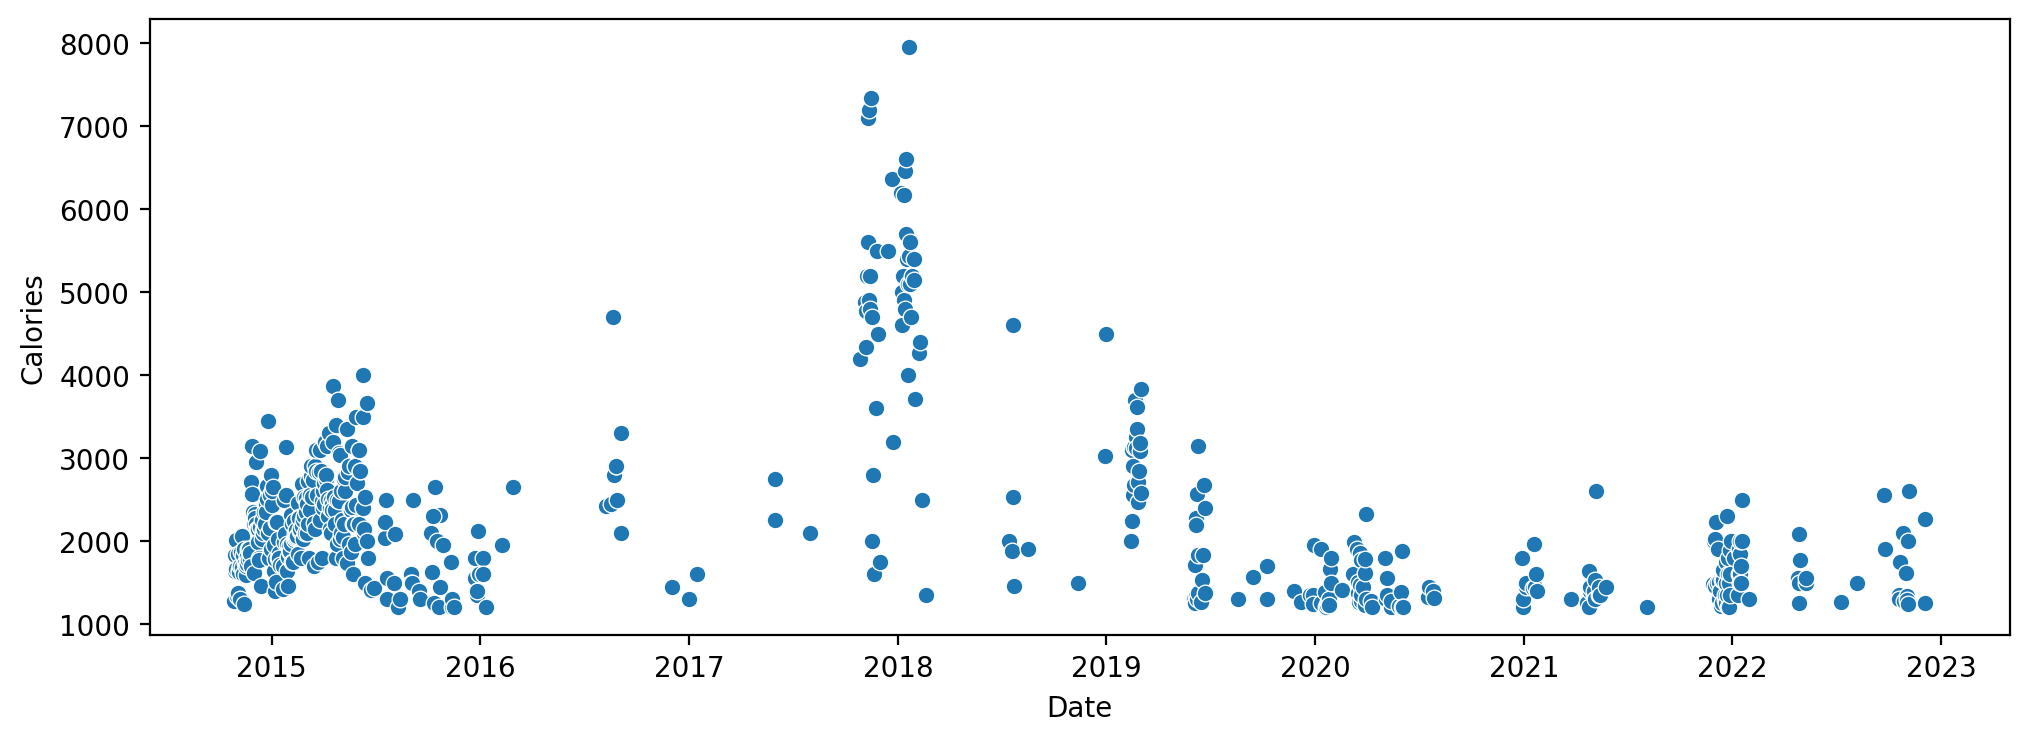

In [149]:
plt.figure(figsize=(12, 4), dpi=200)

sns.scatterplot(x=df_calories.Date, y = df_calories.Calories, data = df_calories)

We have too much data. 

I've dabbled in Calorie counting since my big success in 2014, but for the most part, the data isn't super reliable. 

For example, that spike in the middle, I'm not even sure if that's accurate...

Some of the later data got corrupted by the program I used to track my Calories, MyFitnessPal. 

As frustrating as this is, I'm going to drop it because it doesn't even really help for what we need. 

So let's drop everything after mid June 2015. 

In [150]:
df_calories = df_calories.drop(df_calories.index[220:])

df_calories

,Date,Calories
0,2014-10-27,1280.0
1,2014-10-28,1830.0
2,2014-10-29,1640.0
3,2014-10-30,1660.0
4,2014-10-31,2009.0
...,...,...
215,2015-06-13,2530.0
216,2015-06-14,1500.0
217,2015-06-16,3660.0
218,2015-06-17,2000.0


Real quick, let's make sure everything makes sense here. I'm going to drop all the data that isn't above 1200 Calories. 

In [151]:
df_calories = df_calories[df_calories['Calories']>=1200]

display(df_calories)

,Date,Calories
0,2014-10-27,1280.0
1,2014-10-28,1830.0
2,2014-10-29,1640.0
3,2014-10-30,1660.0
4,2014-10-31,2009.0
...,...,...
215,2015-06-13,2530.0
216,2015-06-14,1500.0
217,2015-06-16,3660.0
218,2015-06-17,2000.0


Nothing dropped, very nice!

Let's wrap this dataframe in a nice csv. 

In [152]:
df_calories.to_csv("signal_calories.csv")

One last thing before we move on to looking at the weight data, let's check the calorie data one more time. 

<AxesSubplot:xlabel='Date', ylabel='Calories'>

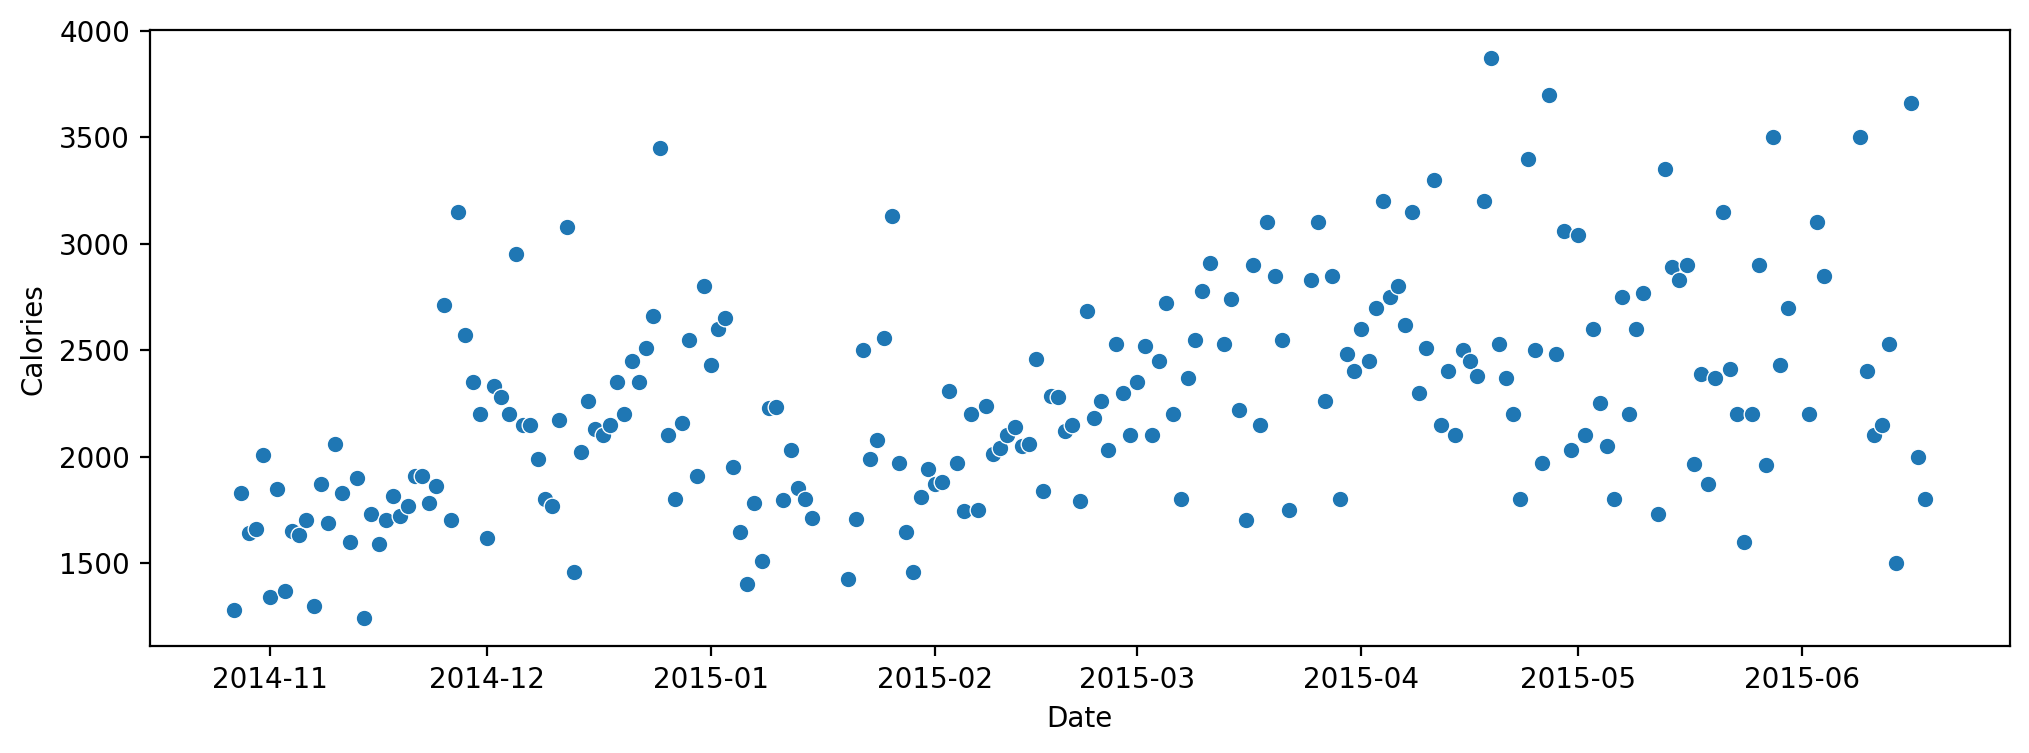

In [153]:
plt.figure(figsize=(12, 4), dpi=200)

sns.scatterplot(x=df_calories.Date, y = df_calories.Calories, data = df_calories)

This is what weight loss looks like. It's pretty cool. 

This doesn't have all the information we need. What's my weight at this time? Age? Doesn't really matter much. I was losing about 1.5 to 2 pounds per week, but there is a lot of variance in the data.

---------------------

Next thing is to process the weight dataframe. 

I have to change the data type for the dates to datetime, then I'll be able to create a good graph and see the weight changes over time. 

In [154]:
df_weight.dtypes

Date       object
Weight    float64
dtype: object

In [155]:
df_weight['Date']=pd.to_datetime(df_weight.Date)

df_weight.dtypes

Date      datetime64[ns]
Weight           float64
dtype: object

In [156]:
df_weight.head()

,Date,Weight
0,2012-06-01,336.0
1,2014-08-01,270.0
2,2014-10-27,257.0
3,2014-10-28,255.0
4,2014-10-29,252.0


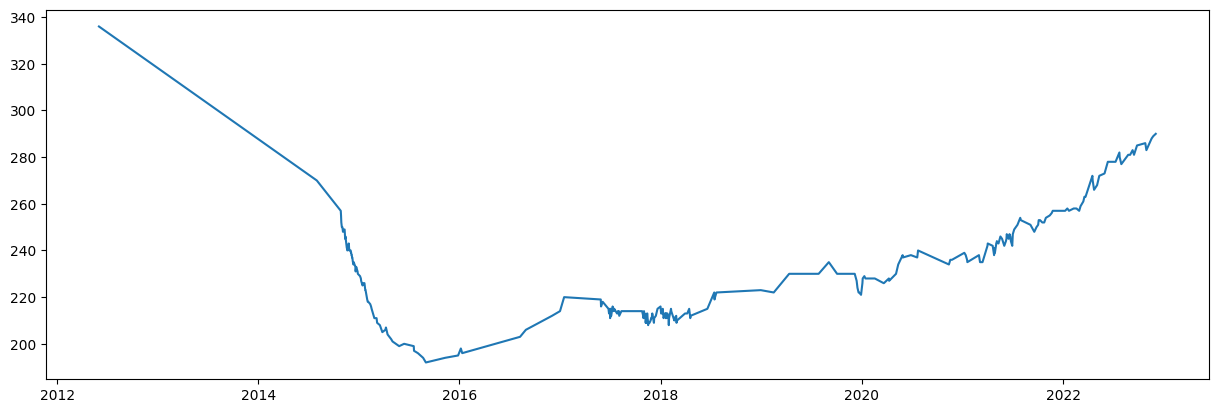

In [157]:
fig=plt.figure()

fig.set_figwidth(15)

plt.plot(df_weight.Date, df_weight.Weight)

plt.show()

And there you go!

Quite a bit of weight loss for the first few years, then a rapid rally over the last couple years. 

Ugh!

Well, time to see what work needs to be done to get back on track. 

So, what's the plan?

Below, I'll create a new dataframe that explores what the Calorie Deficit will need to be to lose two pounds per week. 

In [158]:
deficit_df = pd.DataFrame()
mass = 290
for week in range(50):
    required_energy = tdee(mass, 71, 27, 'lightly_active')
    Calories = round(required_energy - 1000)#*np.random.uniform(.75, 1.25)
    spam = str(week + 1)
    mass = mass - 2
    temp = pd.DataFrame(
    {
        'Week':spam,
        'Calories':Calories,
        'Weight':mass
    }, index = [0])
    
    deficit_df = pd.concat([deficit_df, temp])
    
deficit_df.to_csv("diet_plan.csv", index = False)
deficit_df = deficit_df.reset_index(drop=True)

Let's see what this dataframe is all about. 

In [159]:
deficit_df.head()

,Week,Calories,Weight
0,1,2180,288
1,2,2167,286
2,3,2155,284
3,4,2142,282
4,5,2130,280


In [160]:
deficit_df.tail()

,Week,Calories,Weight
45,46,1618,198
46,47,1606,196
47,48,1593,194
48,49,1581,192
49,50,1569,190


Notice the dramatic difference in the head vs the tail of this dataframe. 

To lose two pounds a week, that's a 600 Calorie difference!

Also, unfortunately, I'll be a year older if I started this today, that's not even accounted for in the calculator above. 

For now, I'll leave it here. There's a lot of power in dataframes and there's plenty more to explore. 